##Independent Project - Week 4
**Research Question**

Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018




##1.0 Importing Python Libraries

In [0]:
#Importing  libraries that will be needed for the project

import pandas as pd
import numpy as np
from datetime import datetime

##1.1 Reading the dataset from our csv file and previewing it.

In [2]:
# Loading our dataset into the notebook
#url = '[http://bit.ly/Autolibdataset' given from external link site
Autolib = pd.read_csv('Autolib_dataset.csv')

## Let's preview the first 5 rows of our dataset
Autolib.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [0]:
# Let's preview the last 5 rows of our dataset

Autolib.tail()


,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27
4999,5 Rue Henry Brisson,4,4,0,0,0,operational,Paris,NaN,paris-henrybrisson-5,STATION,"48.8984293, 2.3347923",75018,Paris/Henry Brisson/5,operational,NaN,0,station,ok,nonexistent,2018,4,8,10,2


##1.2 Accessing information about our dataset

In [0]:
#Lets get the shape of our dataset

Autolib.shape

(5000, 25)

In [0]:
#Get to know more information about our dataset example data types

Autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
Address                5000 non-null object
Cars                   5000 non-null int64
Bluecar counter        5000 non-null int64
Utilib counter         5000 non-null int64
Utilib 1.4 counter     5000 non-null int64
Charge Slots           5000 non-null int64
Charging Status        5000 non-null object
City                   5000 non-null object
Displayed comment      111 non-null object
ID                     5000 non-null object
Kind                   5000 non-null object
Geo point              5000 non-null object
Postal code            5000 non-null int64
Public name            5000 non-null object
Rental status          5000 non-null object
Scheduled at           47 non-null object
Slots                  5000 non-null int64
Station type           5000 non-null object
Status                 5000 non-null object
Subscription status    5000 non-null object
year                   

In [0]:
#The line of code explains the sum of missing values per column

Autolib.isnull().sum()

Address                   0
Cars                      0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Geo point                 0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64

#1.3 Cleaning our dataset



###1.3.1 Validity

In [0]:
#We will drop the columns which has missing values since they have almost all rows with missing values.
#The two columns are Scheduled at and Displayed comment

Autolib.drop(['Displayed comment','Scheduled at'], axis =1, inplace = True)


In [0]:
#Confirming that the two columns have been dropped
Autolib.shape

#New columns have  23 columns

(5000, 23)

In [4]:
#Let's remove use the str.strip function on the respective column name to strip the leading and trailing space 
# Also remove white spaces and convert the column names to lower case

Autolib.columns = Autolib.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
Autolib.tail(15)

,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,displayed_comment,id,kind,geo_point,postal_code,public_name,rental_status,scheduled_at,slots,station_type,status,subscription_status,year,month,day,hour,minute
4985,6 place du PrÃ©sident Mithouard,2,2,0,0,1,operational,Paris,NaN,paris-mithouard-6,STATION,"48.8512827, 2.3129161",75007,Paris/Mithouard/6,operational,NaN,4,station,ok,nonexistent,2018,4,4,2,35
4986,16 Rue Charles de Gaulle,3,3,0,0,0,nonexistent,Alfortville,NaN,alfortville-charlesdegaulle-16,STATION,"48.81456, 2.413135",94140,Alfortville/Charles de Gaulle/16,operational,NaN,3,station,ok,nonexistent,2018,4,3,4,3
4987,6 place Abel Gance,6,6,0,0,0,nonexistent,Boulogne-Billancourt,NaN,boulognebillancourt-abelgance-6,STATION,"48.833663, 2.258714",92100,Boulogne-Billancourt/Abel Gance/6,operational,NaN,0,station,ok,nonexistent,2018,4,8,6,41
4988,62 Rue Ramey,5,5,0,0,1,operational,Paris,NaN,paris-ramey-62,STATION,"48.8916426, 2.3449781",75018,Paris/Ramey/62,operational,NaN,1,station,ok,nonexistent,2018,4,8,11,0
4989,3 Rue Mongenot,4,4,0,0,0,operational,Saint-MandÃ©,NaN,saintmande-mongenot-3,STATION,"48.8435084, 2.4171838",94160,Saint-MandÃ©/Mongenot/3,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,28
4990,47 boulevard de l'HÃ´pital,0,0,0,0,0,operational,Paris,NaN,paris-hopital-47,STATION,"48.84019, 2.362478",75013,Paris/HÃ´pital/47,operational,NaN,4,station,ok,nonexistent,2018,4,3,21,13
4991,56 avenue du MarÃ©chal de Lattre de Tassigny,5,5,0,0,0,nonexistent,CrÃ©teil,NaN,creteil-marechaldelattredetassigny-56,STATION,"48.79834, 2.455145",94000,CrÃ©teil/MarÃ©chal de Lattre de Tassigny/56,operational,NaN,1,station,ok,nonexistent,2018,4,7,20,43
4992,3 avenue d'Ivry,0,0,0,0,2,operational,Paris,NaN,paris-ivry-3,STATION,"48.82175, 2.36868",75013,Paris/Ivry/3,operational,NaN,6,station,ok,nonexistent,2018,4,9,23,1
4993,6 avenue Charles-de-Gaulle,6,6,0,0,0,nonexistent,Le Plessis-Robinson,NaN,leplessisrobinson-charlesdegaulle-6,STATION,"48.781849, 2.263931",92350,Le Plessis-Robinson/Charles-de-Gaulle/6,operational,NaN,0,station,ok,nonexistent,2018,4,2,4,43
4994,15 rue de Rocroy,0,0,0,0,0,operational,Paris,NaN,paris-rocroy-15,STATION,"48.8801236, 2.3509617",75010,Paris/Rocroy/15,operational,NaN,1,station,ok,nonexistent,2018,4,1,20,49


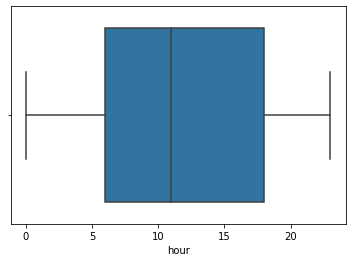

In [0]:
#We can discover outliers using data visualization tools
#First import seaborn library
import seaborn as sns

#Plot the boxplot using one column .On this case we used bluecar_counter
sns.boxplot(x=Autolib['hour'])

In [0]:
Q1 = Autolib.quantile(0.25)
Q3 = Autolib.quantile(0.75)

IQR = Q3 - Q1


(Autolib < (Q1 - 1.5 * IQR)) |(Autolib > (Q3 + 1.5 * IQR))


# The two commented lines of code below can be used to drop the outliers but for now I will not drop them since the data
#does not seem to have extreem outliers.This is due to the range of each column.

# Autolib_no_outlier = Electric[~((Autolib < (Q1 - 1.5 * IQR)) | (Autolib > (Q3 + 1.5 * IQR))).any(axis = 1)]

# print(Autolib_no_outlier)

,address,bluecar_counter,cars,charge_slots,charging_status,city,day,geo_point,hour,id,kind,minute,month,postal_code,public_name,rental_status,slots,station_type,status,subscription_status,utilib_1.4_counter,utilib_counter,year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### 1.3.2 Accuracy

In [0]:
#At this stage ,we check if the its true that the column cars and bluecar counter are the same as explained in the data glossary
def  number(row):
  if row['cars'] == row['bluecar_counter']:
    return 'True'
  else:
      return 'False'
#Apply the lambda function and create a new column with the new row
Autolib['Verifier_column']=Autolib.apply (lambda row: number(row), axis=1)
Autolib.head(10)

,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,postal_code,public_name,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute,Verifier_column
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43,True
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24,True
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14,True
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37,True
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23,True
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,4,station,ok,nonexistent,2018,4,6,7,2,True
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,0,station,closed,nonexistent,2018,4,8,18,20,True
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,0,station,ok,nonexistent,2018,4,4,22,13,True
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,4,station,ok,nonexistent,2018,4,2,22,58,True
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,0,station,ok,nonexistent,2018,4,4,15,2,True


In [0]:
#This is to verify that the two columns are true.
len(Autolib[Autolib['Verifier_column'] == 'True'])
#All the rows under column name cars and blue-car counter are equal to each other

5000

## 1.3.3 Completness

In [0]:
#Check if there are any null values.
#We had done this above and dropped all columns that have maximum number of missing values.
#To verify that dataset has no misiing values we use isnull function
Autolib.isnull().sum()

address                0
cars                   0
bluecar_counter        0
utilib_counter         0
utilib_1.4_counter     0
charge_slots           0
charging_status        0
city                   0
id                     0
kind                   0
geo_point              0
postal_code            0
public_name            0
rental_status          0
slots                  0
station_type           0
status                 0
subscription_status    0
year                   0
month                  0
day                    0
hour                   0
minute                 0
Verifier_column        0
dtype: int64

###1.3.4 Consistency

In [0]:
#Under consistency we check for duplicates
# Duplicates are data points that are repeated in our dataset. 
# These should be simply removed.
#To check if our dataset has duplicate values, we use the duplicated function
Autolib.duplicated().sum()

#There are zero duplicates

0

###1.3.5 Uniformity

In [0]:
#Data Cleaning:None
# We had cleaned the data above. To confirm data types
Autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
address                5000 non-null object
cars                   5000 non-null int64
bluecar_counter        5000 non-null int64
utilib_counter         5000 non-null int64
utilib_1.4_counter     5000 non-null int64
charge_slots           5000 non-null int64
charging_status        5000 non-null object
city                   5000 non-null object
id                     5000 non-null object
kind                   5000 non-null object
geo_point              5000 non-null object
postal_code            5000 non-null int64
public_name            5000 non-null object
rental_status          5000 non-null object
slots                  5000 non-null int64
station_type           5000 non-null object
status                 5000 non-null object
subscription_status    5000 non-null object
year                   5000 non-null int64
month                  5000 non-null int64
day                   

##1.4 Answering questions

## Question 1

**1. Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018**

In [18]:
#The most popular hour of the day for picking up a shared blue electric car in the city of paris in the month of april 2018
#First filter to only paris 
new_Autolib_paris = Autolib[Autolib['city'] =='Paris'] 
new_Autolib_paris

#Group by hour to find the most used bluecars
Paris_hour = new_Autolib_paris.groupby(['hour'])['bluecar_counter'].sum().diff().sort_values(ascending = False)
Paris_hour.head(1)

#The most popular hour is 21. It has the highest positive value


hour
21    119.0
Name: bluecar_counter, dtype: float64

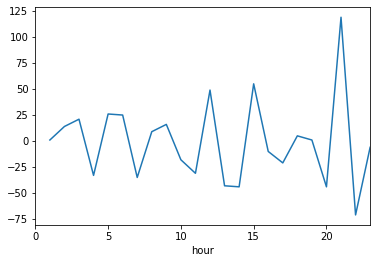

In [0]:
#We can plot above output to find the most popular hour of the day for picking up blue cars in paris

Paris_hour = new_Autolib_paris.groupby(['hour'])['bluecar_counter'].sum().diff().plot()
Paris_hour

In [0]:
# Creating a new column where we find the difference in the number of bluecars at the station/counter

Autolib['bluecar_Diff'] = Autolib['bluecar_counter'].diff()
Autolib.head()

,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,postal_code,public_name,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute,Verifier_column,bluecar_Diff
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43,True,NaN
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24,True,6.0
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14,True,-3.0
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37,True,0.0
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23,True,0.0


##Question 2

In [6]:


# What is the most popular hour for returning cars?


Autolib['total_cars'] = Autolib.iloc[:,2:4].sum(axis = 1)
Autolib.head()

,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,displayed_comment,id,kind,geo_point,postal_code,public_name,rental_status,scheduled_at,slots,station_type,status,subscription_status,year,month,day,hour,minute,total_cars
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43,0
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24,6
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14,3
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37,4
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23,3


In [19]:
cars = Autolib.groupby(['hour'])['total_cars'].sum().diff().sort_values(ascending=True)
cars.head(1)
#The most popular hour for returning is hour 14hrs. Has the highest positive total

hour
14   -119.0
Name: total_cars, dtype: float64

##Question 3

In [0]:


# What station is the most popular?
# Overall?
#At the most popular picking hour?

Popular_station = Autolib.groupby(['id','hour'])['total_cars'].sum().sort_values(ascending = False)
Popular_station.head()

id                                   hour
courbevoie-paix-2                    2       15
paris-portedevilliers-28             8       15
saintouen-louisblanc-35              2       14
paris-claudebernard-16               4       14
fontenayauxroses-divisionleclerc-31  7       14
Name: total_cars, dtype: int64

In [8]:
# Finding the most popular hour
popular_hour = Autolib.groupby(['hour'])['total_cars'].sum().diff().sort_values(ascending = False)
popular_hour.head(1)
#Most popular hour is one with highest negative value. This is 21

hour
21    96.0
Name: total_cars, dtype: float64

##Question 4


In [10]:


# What station is the most popular? At the most popular picking hour?
  
#Autolib_paris[(Autolib_paris['Kind'] == 'STATION') & (Autolib_paris['Status'] == 'ok') & (Autolib_paris['hour'] == 4)].groupby('Public name')['Public name'].count().sort_values(ascending= False)
## Subsetting the most popular picking hour (8)

Hour = Autolib[(Autolib.hour == 14)]
Hour.head()


,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,displayed_comment,id,kind,geo_point,postal_code,public_name,rental_status,scheduled_at,slots,station_type,status,subscription_status,year,month,day,hour,minute,total_cars
63,147 rue de Paris,3,3,0,0,0,nonexistent,Charenton-le-Pont,NaN,charentonlepont-paris-147,STATION,"48.82687, 2.405368",94220,Charenton-le-Pont/Paris/147,operational,NaN,0,station,ok,nonexistent,2018,4,2,14,38,3
80,4 Rue Lobau,0,0,0,0,0,nonexistent,Paris,"Borne d'abonnement en sous-sol (niv -1), accÃ¨...",paris-lobau-parking,PARKING,"48.85608, 2.35342",75004,Paris/Lobau/Parking,broken,NaN,0,station,closed,broken,2018,4,8,14,3,0
126,38 Rue RÃ©aumur,0,0,0,0,2,operational,Paris,NaN,paris-reaumur-38,STATION,"48.8653769, 2.3573678",75003,Paris/RÃ©aumur/38,operational,NaN,6,station,ok,nonexistent,2018,4,2,14,32,0
129,19 Rue des Filles du Calvaire,1,1,1,0,1,operational,Paris,NaN,paris-fillesducalvaire-19,STATION,"48.8628, 2.3660304",75003,Paris/Filles du Calvaire/19,operational,NaN,1,station,ok,nonexistent,2018,4,5,14,51,2
140,44 rue de Fontenay,2,2,0,1,0,nonexistent,Vincennes,NaN,vincennes-fontenay-44,STATION,"48.84779, 2.44345",94300,Vincennes/Fontenay/44,operational,NaN,0,station,ok,nonexistent,2018,4,7,14,50,2


**Most popular station hour**

In [0]:
#Most popular station hour
popular_station_hour = Hour.groupby(['public_name'])['total_cars'].sum().sort_values(ascending = False)
popular_station_hour.head()


public_name
Gennevilliers/Petits marais/4       8
Paris/Lecourbe/336                  6
Le Chesnay/Charles de Gaulle/103    6
Paris/Villiers/46                   6
Garches/De Gaulle/168               6
Name: total_cars, dtype: int64

**Finding the most popular city**

In [7]:
popular_city = Autolib.groupby(['city'])['total_cars'].sum().sort_values(ascending = False)
popular_city.head()

city
Paris                  5293
Nanterre                473
Issy-les-Moulineaux     325
CrÃ©teil                323
Rueil-Malmaison         305
Name: total_cars, dtype: int64

**Most popular postal code**

In [9]:
popular_code = Autolib.groupby(['hour','postal_code'])['bluecar_counter'].sum().diff().sort_values(ascending = True)
popular_code.head()

hour  postal_code
7     92120         -43.0
6     78000         -38.0
20    94110         -38.0
13    92100         -35.0
11    75018         -32.0
Name: bluecar_counter, dtype: float64